<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")  # Replace "your_dataset.csv" with the path to your dataset file

# Preprocess the dataset
tokenizer = Tokenizer(num_words=5000)  # Set the maximum number of words to consider
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X)

# Convert labels to categorical data
y = pd.get_dummies(df['label']).values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=24, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/24
69/69 [==============================] - 24s 215ms/step - loss: 1.5748 - accuracy: 0.2714 - val_loss: 1.3889 - val_accuracy: 0.4338
Epoch 2/24
69/69 [==============================] - 12s 181ms/step - loss: 0.8417 - accuracy: 0.7105 - val_loss: 0.9057 - val_accuracy: 0.6987
Epoch 3/24
69/69 [==============================] - 11s 162ms/step - loss: 0.3701 - accuracy: 0.8805 - val_loss: 0.9206 - val_accuracy: 0.7024
Epoch 4/24
69/69 [==============================] - 12s 176ms/step - loss: 0.1966 - accuracy: 0.9418 - val_loss: 1.0443 - val_accuracy: 0.6407
Epoch 5/24
69/69 [==============================] - 13s 183ms/step - loss: 0.1404 - accuracy: 0.9677 - val_loss: 0.9346 - val_accuracy: 0.7459
Epoch 6/24
69/69 [==============================] - 13s 185ms/step - loss: 0.0702 - accuracy: 0.9845 - val_loss: 1.0764 - val_accuracy: 0.7278
Epoch 7/24
69/69 [==============================] - 13s 187ms/step - loss: 0.0526 - accuracy: 0.9877 - val_loss: 1.0275 - val_accuracy: 0.7568

#Precision Recall F1

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have trained your BiLSTM model and obtained predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test_classes, y_pred_classes, average=None)
recall = recall_score(y_test_classes, y_pred_classes, average=None)
f1 = f1_score(y_test_classes, y_pred_classes, average=None)

# Create a dictionary to store the results for each class
results = {
    'cy-flaming': {'precision': precision[0], 'recall': recall[0], 'f1': f1[0]},
    'cy-threat': {'precision': precision[1], 'recall': recall[1], 'f1': f1[1]},
    'cy-racism': {'precision': precision[2], 'recall': recall[2], 'f1': f1[2]},
    'cy-pull-a-pig': {'precision': precision[3], 'recall': recall[3], 'f1': f1[3]},
    'not bullying': {'precision': precision[4], 'recall': recall[4], 'f1': f1[4]}
}

# Print the results for each class
for class_name, metrics in results.items():
    print("{}:".format(class_name))
    print("Precision: {:.4f}".format(metrics['precision']))
    print("Recall: {:.4f}".format(metrics['recall']))
    print("F1 Score: {:.4f}".format(metrics['f1']))
    print()


18/18 [==============================] - 1s 59ms/step
cy-flaming:
Precision: 0.6792
Recall: 0.5669
F1 Score: 0.6180

cy-threat:
Precision: 0.7326
Recall: 0.6923
F1 Score: 0.7119

cy-racism:
Precision: 0.6866
Recall: 0.7541
F1 Score: 0.7188

cy-pull-a-pig:
Precision: 0.7961
Recall: 0.8039
F1 Score: 0.8000

not bullying:
Precision: 0.7459
Recall: 0.8349
F1 Score: 0.7879



#Confusion Matrix

18/18 [==============================] - 1s 52ms/step


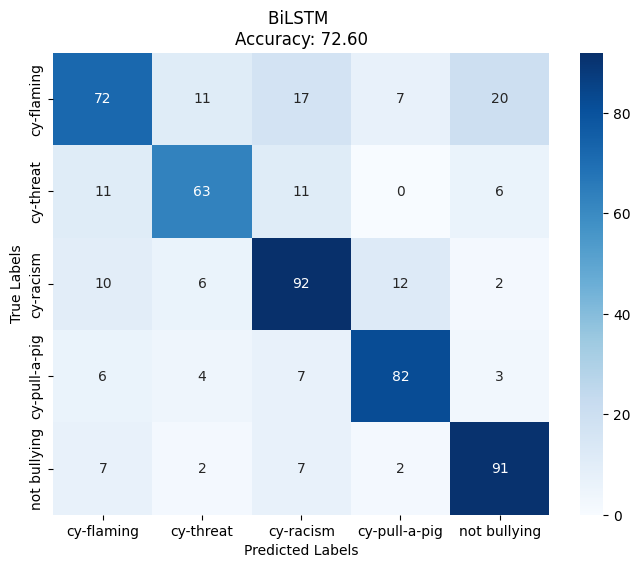

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained your BiLSTM model and obtained predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Create a list of class names
class_names = ['cy-flaming', 'cy-threat', 'cy-racism', 'cy-pull-a-pig', 'not bullying']

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Plot the confusion matrix with accuracy in the title
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('BiLSTM \nAccuracy: {0:.2f}'.format(accuracy*100))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#ROC

18/18 [==============================] - 1s 76ms/step


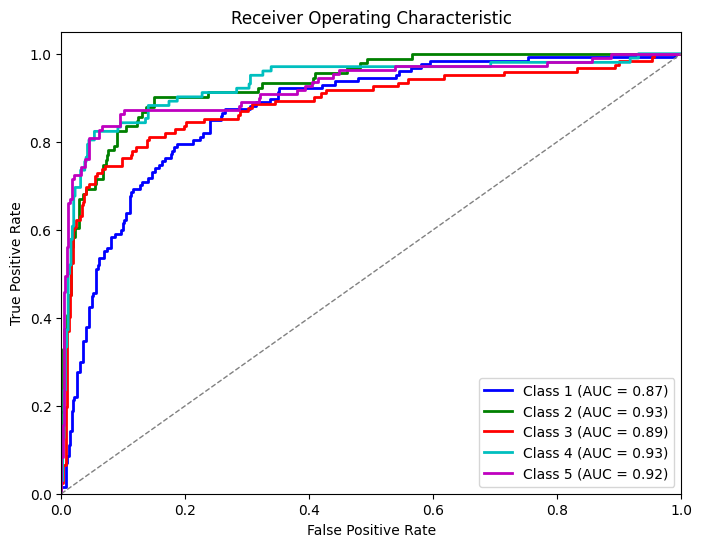

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained your BiLSTM model and obtained predictions
y_pred = model.predict(X_test)

# Calculate the false positive rate (FPR), true positive rate (TPR), and area under the ROC curve (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {0} (AUC = {1:.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
